# Airbnb Machine Learning Regression Analysis

1. Import libraries and data
2. Data Cleaning
3. Data Prep for Regression Analysis
4. Regression Analysis
Bonus: Performance improvement after removing outliers

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\lizan\Desktop\Data Analytics\07-22 Airbnb Toronto Analysis'

In [4]:
bnb = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'Listings_Calendar_Combined.pkl'))

In [5]:
bnb.shape

(5537417, 25)

# 2. Data Cleaning

In [6]:
bnb.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price_x',
       'minimum_nights_x', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'date',
       'available', 'price_y', 'adjusted_price', 'minimum_nights_y',
       'maximum_nights', '_merge'],
      dtype='object')

In [7]:
bnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,...,availability_365,number_of_reviews_ltm,license,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights,_merge
0,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-06,f,469.0,469.0,28.0,NaN,both
1,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-07,f,469.0,469.0,28.0,NaN,both
2,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-08,f,469.0,469.0,28.0,NaN,both
3,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-09,f,469.0,469.0,28.0,NaN,both
4,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-10,f,469.0,469.0,28.0,NaN,both


In [8]:
bnb.drop(columns=['Unnamed: 0'])

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights_x,...,availability_365,number_of_reviews_ltm,license,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights,_merge
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-06,f,469.0,469.0,28.0,NaN,both
1,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-07,f,469.0,469.0,28.0,NaN,both
2,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-08,f,469.0,469.0,28.0,NaN,both
3,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-09,f,469.0,469.0,28.0,NaN,both
4,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-10,f,469.0,469.0,28.0,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537412,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-05-31,f,108.0,108.0,1.0,30.0,both
5537413,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-06-01,f,108.0,108.0,1.0,30.0,both
5537414,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-06-02,f,108.0,108.0,1.0,30.0,both
5537415,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-06-03,f,108.0,108.0,1.0,30.0,both


In [9]:
# rename price_x to list_price and price_y to booked_price
bnb.rename(columns= {'price_x' : 'list_price', 'price_y' : 'booked_price'}, inplace = True)

In [10]:
# drop duplicated minimum_nights column
bnb.drop(columns = ['minimum_nights_x'])

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,list_price,...,availability_365,number_of_reviews_ltm,license,date,available,booked_price,adjusted_price,minimum_nights_y,maximum_nights,_merge
0,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-06,f,469.0,469.0,28.0,NaN,both
1,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-07,f,469.0,469.0,28.0,NaN,both
2,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-08,f,469.0,469.0,28.0,NaN,both
3,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-09,f,469.0,469.0,28.0,NaN,both
4,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-10,f,469.0,469.0,28.0,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537412,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-05-31,f,108.0,108.0,1.0,30.0,both
5537413,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-06-01,f,108.0,108.0,1.0,30.0,both
5537414,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-06-02,f,108.0,108.0,1.0,30.0,both
5537415,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-06-03,f,108.0,108.0,1.0,30.0,both


In [11]:
#rename minimum_nights_x to minimum_nights
bnb.rename(columns= {'minimum_nights_x' : 'minimum_nights'}, inplace = True)

In [12]:
# Check for missing values
bnb.isnull().sum()

Unnamed: 0                              0
listing_id                              0
name                                  730
host_id                                 0
host_name                            1095
neighbourhood                           0
latitude                                0
longitude                               0
room_type                               0
list_price                           2190
minimum_nights                     121910
number_of_reviews                       0
last_review                       1176395
reviews_per_month                 1176395
calculated_host_listings_count          0
availability_365                        0
number_of_reviews_ltm                   0
license                           3458375
date                                    0
available                               0
booked_price                         2663
adjusted_price                       2663
minimum_nights_y                   124929
maximum_nights                    

In [14]:
# Impute missing booked price values with median
bnb['booked_price'].fillna(bnb['booked_price'].median(), inplace=True)

In [15]:
# check for duplicates
dups = bnb.duplicated()

In [16]:
dups.shape

(5537417,)

<AxesSubplot:xlabel='booked_price', ylabel='Count'>

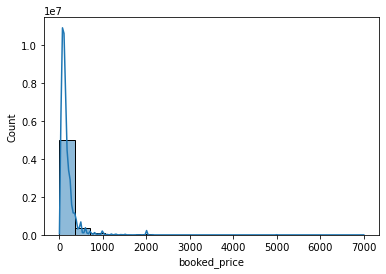

In [18]:
#extreme values check
sns.histplot(bnb['booked_price'], bins=20, kde = True) 

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

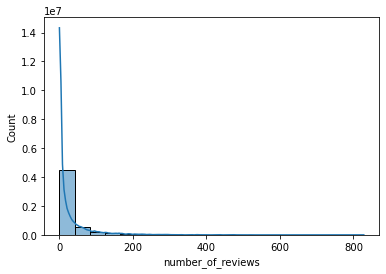

In [19]:
#extreme values check
sns.histplot(bnb['number_of_reviews'], bins=20, kde = True) 

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

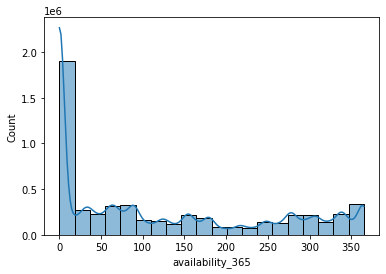

In [20]:
#extreme values check
sns.histplot(bnb['availability_365'], bins=20, kde = True) 

In [22]:
bnb['booked_price'].mean() # Check the mean

180.0404930674356

In [23]:
bnb['booked_price'].median() # Check the median

120.0

In [24]:
bnb['booked_price'].max() # Check the max

7000.0

In [25]:
bnb['number_of_reviews'].mean() # Check the mean

27.184422809407348

In [26]:
bnb['number_of_reviews'].median() # Check the median

6.0

In [27]:
bnb['number_of_reviews'].max() # Check the max

828

In [28]:
bnb['availability_365'].mean() # Check the mean

122.06567339970965

In [29]:
bnb['availability_365'].median() # Check the median

77.0

In [30]:
bnb['availability_365'].max() # Check the max

365

# 3. Data Prep for Regression Analysis

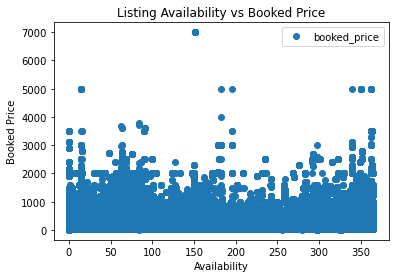

In [31]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

bnb.plot(x = 'availability_365', y='booked_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Listing Availability vs Booked Price')  
plt.xlabel('Availability')  
plt.ylabel('Booked Price')  
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = bnb['availability_365'].values.reshape(-1,1)
y = bnb['booked_price'].values.reshape(-1,1)

In [34]:
X

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [81],
       [81],
       [81]], dtype=int64)

In [35]:
y

array([[469.],
       [469.],
       [469.],
       ...,
       [108.],
       [108.],
       [108.]])

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [37]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

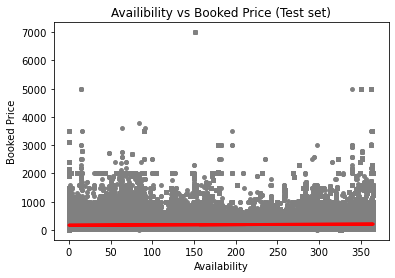

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Availibility vs Booked Price (Test set)')
plot_test.xlabel('Availability')
plot_test.ylabel('Booked Price')
plot_test.show()

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10636772]]
Mean squared error:  49640.12528742275
R2 score:  0.003668441561885172


In [43]:
y_predicted

array([[183.86891086],
       [205.88702814],
       [172.06209434],
       ...,
       [203.54693838],
       [170.14747545],
       [189.40003211]])

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,106.0,183.868911
1,925.0,205.887028
2,270.0,172.062094
3,99.0,196.313934
4,284.0,200.462275
5,49.0,170.041108
6,69.0,178.975996
7,207.0,175.891332
8,79.0,202.164158
9,106.0,167.062812


## Compare how the regression fits the training set

In [47]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!mm

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10636772]]
Mean squared error:  49849.94647929117
R2 score:  0.0036229449014062443


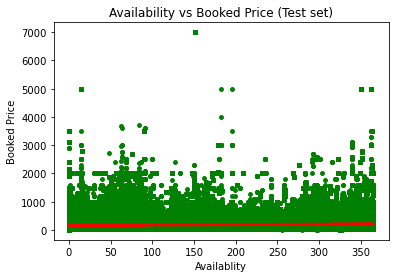

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Availability vs Booked Price (Test set)')
plot_test.xlabel('Availablity')
plot_test.ylabel('Booked Price')
plot_test.show()

This is not a good model for predicting the price per night for an Airbnb rental.

# Bonus: Performance Improvement after Removing Outliers

In [51]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

bnb_test = bnb[bnb['booked_price'] <=500] 

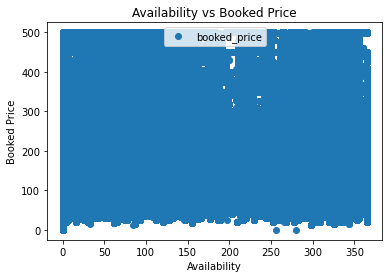

In [53]:
# See how the scatterplot looks without outliers.

bnb_test.plot(x = 'availability_365', y='booked_price', style='o')  
plt.title('Availability vs Booked Price')  
plt.xlabel('Availability')  
plt.ylabel('Booked Price')  
plt.show()

In [54]:
# Reshape again.

X_2 = bnb_test['availability_365'].values.reshape(-1,1)
y_2 = bnb_test['booked_price'].values.reshape(-1,1)

In [55]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [56]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [57]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [58]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05171912]]
Mean squared error:  9449.208219027852
R2 score:  0.0046959151878738226


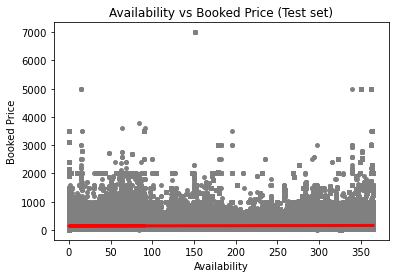

In [60]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Availability vs Booked Price (Test set)')
plot_test.xlabel('Availability')
plot_test.ylabel('Booked Price')
plot_test.show()

The result of this regression has lead me to reject a hypothsis that a listing with less availability will have a higher price per night.  It could be interesting to compare the number of reviews against the listing availability.